In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 100

p = np.random.multivariate_normal([0.5, 0.5], [[0.05, 0], [0, 0.035]], n_samples)
py = np.ones(n_samples)

q = np.random.multivariate_normal([-0.5, -0.5], [[0.05, 0], [0, 0.035]], n_samples)
qy = -np.ones(n_samples)

sp = np.vstack((p, q))
sy = np.hstack((py, qy))

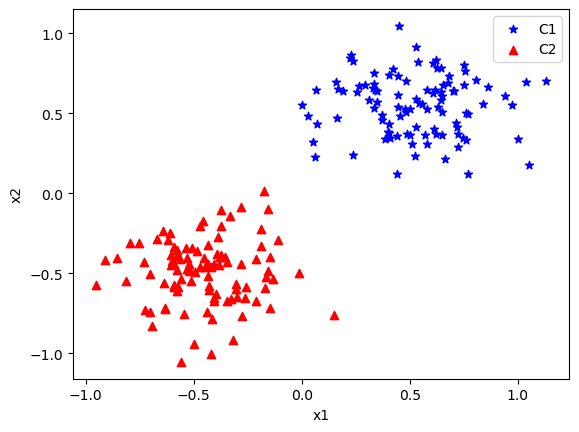

In [3]:
datasets = [p, q]
colors = ['blue', 'red']
markers = ['*', '^']
labels = ['C1', 'C2']

for data, color, marker, label in zip(datasets, colors, markers, labels):
    plt.scatter(data[:, 0], data[:, 1], color=color, marker=marker, label=label)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

In [4]:
import numpy as np

class perceptron(object):
    def __init__(self, learning_rate=0.01, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def train(self, data, labels):
        self.coefficients = np.zeros(1 + data.shape[1])
        self.adjustments = []

        for epoch in range(self.epochs):
            total_adjustments = 0
            for feature_set, desired_output in zip(data, labels):
                prediction_error = desired_output - self.classify(feature_set)
                delta = self.learning_rate * prediction_error
                self.coefficients[1:] += delta * feature_set
                self.coefficients[0] += delta
                total_adjustments += int(delta != 0)
            self.adjustments.append(total_adjustments)
        return self
        
    def weighted_sum(self, data):
        return np.dot(data, self.coefficients[1:]) + self.coefficients[0]
        
    def classify(self, data):
        return np.where(self.weighted_sum(data) >= 0.0, 1, -1)


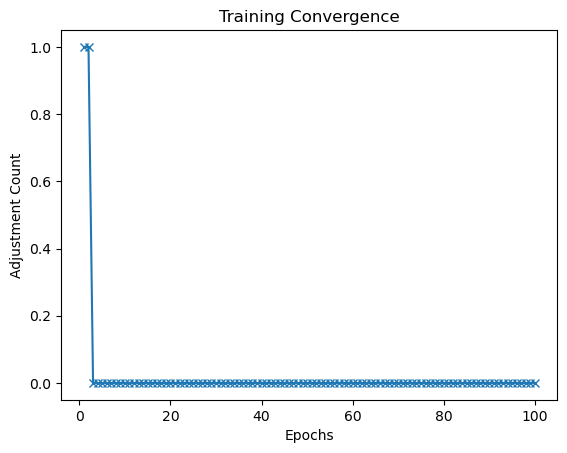

In [5]:
neuron = perceptron(learning_rate=1, epochs=100)
neuron.train(sp,sy)

plt.plot(range(1, len(neuron.adjustments) + 1), neuron.adjustments, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Adjustment Count')
plt.title('Training Convergence')
plt.show()

In [6]:
def convergence(E):
  for i in range(len(E)):
    if E[i] == 0:
      return i

In [7]:
print(convergence(neuron.adjustments)+1)

3


We can deduce from the preceding graph that the parameters converged after the 3rd iteration, indicating that a linearly separating line had been discovered.

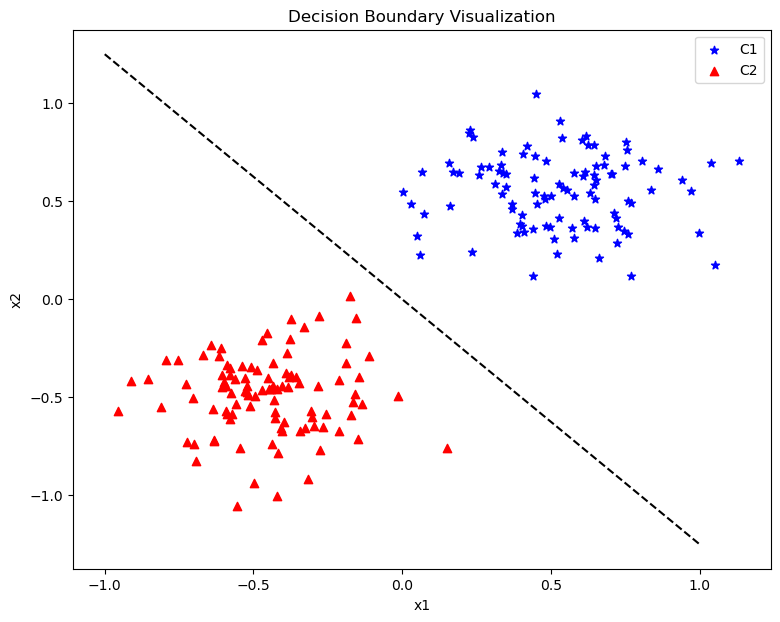

In [8]:
gradient = - neuron.coefficients[1] / neuron.coefficients[2]
y_intercept = - neuron.coefficients[0] / neuron.coefficients[2]

x_values = np.linspace(-1, 1, 10)
y_values = gradient * x_values + y_intercept

plt.figure(figsize=(9, 7))
plt.scatter(p[:, 0], p[:, 1], color='blue', marker='*', label='C1')
plt.scatter(q[:, 0], q[:, 1], color='red', marker='^', label='C2')
plt.plot(x_values, y_values, 'k--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.title('Decision Boundary Visualization')
plt.show()

In [9]:
a = np.random.multivariate_normal([0.5, 0.5], [[0.5, 0], [0, 0.75]], n_samples)
ay = np.ones(n_samples)

b = np.random.multivariate_normal([-0.5, -0.5], [[0.5, 0], [0, 0.75]], n_samples)
by = -np.ones(n_samples)

sa = np.vstack((a, b))
sy = np.hstack((ay, by))

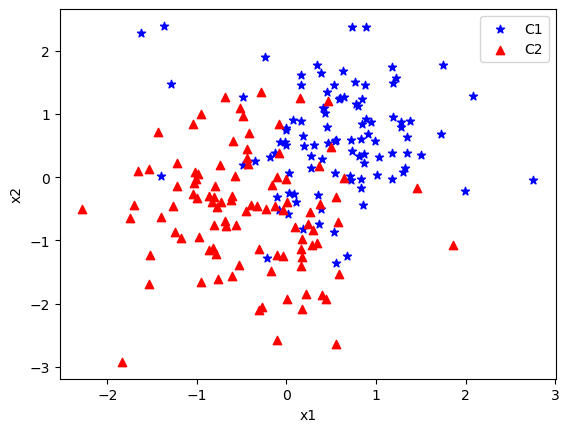

In [10]:
plt.scatter(a[:,0],a[:,1],color='blue', marker='*', label='C1')
plt.scatter(b[:,0],b[:,1],color='red', marker='^', label='C2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
plt.show()

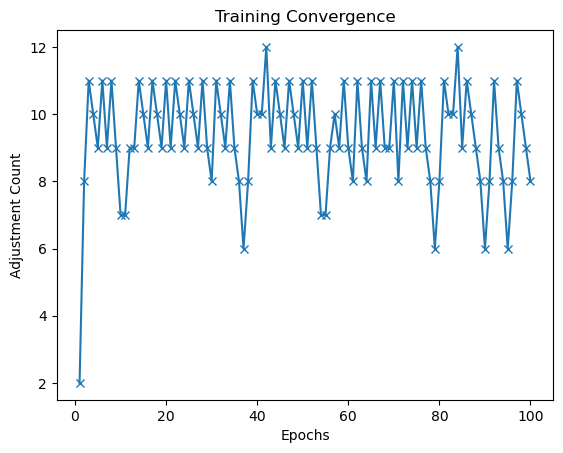

In [11]:
neuron = perceptron(learning_rate=1, epochs=100)
neuron.train(sa,sy)

plt.plot(range(1, len(neuron.adjustments) + 1), neuron.adjustments, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Adjustment Count')
plt.title('Training Convergence')
plt.show()

As seen in the graph above, the algorithm is continuously trying to fix itself but fails, never achieving convergence. Since the data points cannot be separated linearly, the technique would still fail even if the number of epochs were increased.